In [14]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

from utils import helper, Solver, TimeKeeper
from utils import Solver

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data_df = pd.read_csv('data/mid_res/20210526_data_df.csv')
val_df = pd.read_csv('data/mid_res/20210526_val_df.csv')
df = pd.concat([data_df, val_df], axis = 0)

In [3]:
col_drop_x = ['time', 'label']
col_label = 'label'
col_drop = ['latitude',
 'longitude',
 'altitude',
 'time_dlt',
 'valid_dlt',
 'east',
 'north',
 'east_dlt',
 'north_dlt',
 'east_speed',
 'north_speed',
 'cells_ctype_mode',
 'speed_dif',
 'speed_dlt',
 'speed'
 ]

In [6]:
with open('data/mid_res/test.pickle', 'rb') as f:  
    test = pickle.load(f)

X_train, y_train = df.drop(col_drop_x + col_drop, axis = 1).fillna(0), df[col_label]
X_test = test.df.drop(['time'] + col_drop, axis = 1).fillna(0)

In [7]:
solver = Solver.Solver(X_train, y_train)

X_train: (1124485, 32)
y_train: 1124485


In [8]:
solver.train()

Training rf...
Time elapsed for training rf: 30.23
Training bag (tree-based)...
Time elapsed for training bag (tree-based): 38.15
Training LightGBM...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4948
[LightGBM] [Info] Number of data points in the train set: 899588, number of used features: 32
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score -2.000468
[LightGBM] [Info] Start training from score -2.0

[[147390   1229     21    399    133    190    496   2279]
 [  2350 138492    113    507    248    468   1566   5171]
 [    79   1366  41459   2043     10     79      0     14]
 [   287   1230    194 125718    489    185     86   1245]
 [   419    846     64   4208 171374   1024   1110    123]
 [  1414    490     35   1546   9943 134933   2456      4]
 [  3224    544     29    374   8057   3483 161698    659]
 [   561     83      0      6   2952    401   2091 134798]]
              precision    recall  f1-score   support

       Still       0.95      0.97      0.96    152137
     Walking       0.96      0.93      0.94    148915
         Run       0.99      0.92      0.95     45050
        Bike       0.93      0.97      0.95    129434
         Car       0.89      0.96      0.92    179168
         Bus       0.96      0.89      0.93    150821
       Train       0.95      0.91      0.93    178068
      Subway       0.93      0.96      0.95    140892

    accuracy                           

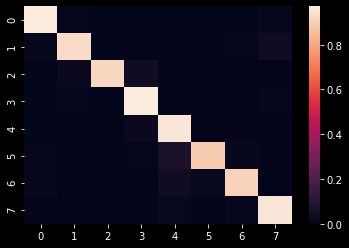

In [10]:
# for training dataset
solver.predict_raw(X_train, y_train)
solver.predict_mean()
helper.evaluate(y_train, solver.pred_mean)

In [11]:
# for validate dataset
timer = TimeKeeper.TimeKeeper()
solver.predict_raw(X_test)
solver.predict_mean()
print("Time used: {}".format(timer.get_update_time()))

Time used: 47.03


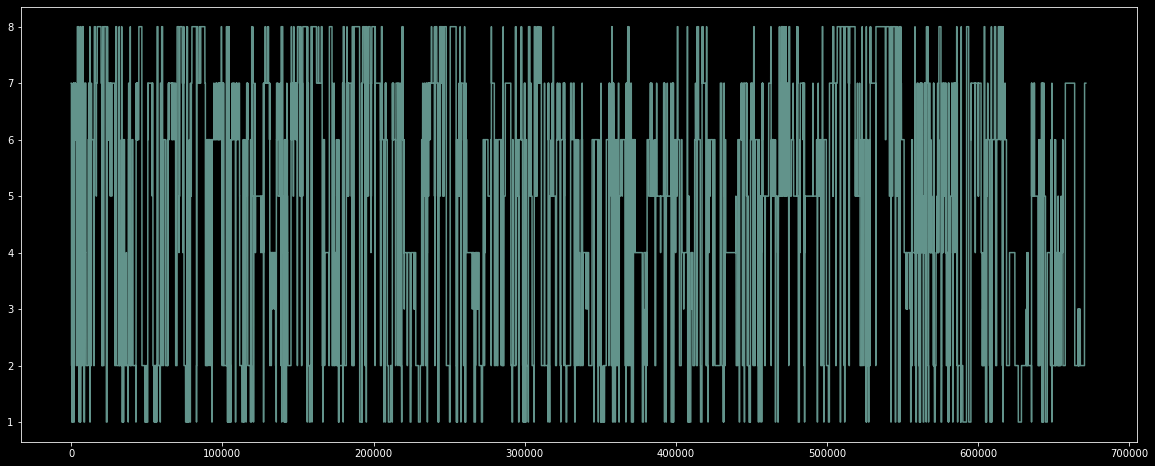

In [18]:
plt.figure(figsize = [20, 8])
plt.plot(solver.pred_mean, alpha = 0.7)

In [19]:
with open('model/model_for_submission.pickle','wb') as p:
    pickle.dump(solver, p)